In [52]:
from math import sqrt 
import skimage.io as io
from skimage import data 
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

In [54]:
#image = data.hubble_deep_field()[0:500, 0:500]
image = io.imread("pd.png",as_gray=False)
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
print(image_gray)
print(blobs_log)
blobs_log[:, 2]

[[0.33357137 0.33357137 0.33357137 ... 0.33357137 0.33357137 0.33357137]
 [0.3296498  0.3296498  0.3296498  ... 0.3296498  0.3296498  0.3296498 ]
 [0.32572824 0.32572824 0.32572824 ... 0.32572824 0.32572824 0.32572824]
 ...
 [0.34480039 0.34480039 0.34480039 ... 0.06666667 0.06666667 0.06666667]
 [0.34480039 0.34480039 0.34480039 ... 0.06666667 0.06666667 0.06666667]
 [0.34480039 0.34480039 0.34480039 ... 0.06666667 0.06666667 0.06666667]]
[[1.06600000e+03 1.53000000e+02 1.00000000e+00]
 [1.06500000e+03 1.42000000e+02 1.00000000e+00]
 [1.06300000e+03 1.11900000e+03 1.00000000e+00]
 ...
 [6.00000000e+00 1.87400000e+03 1.00000000e+00]
 [5.00000000e+00 1.87700000e+03 1.00000000e+00]
 [0.00000000e+00 1.77200000e+03 1.38888889e+01]]


array([ 1.        ,  1.        ,  1.        , ...,  1.        ,
        1.        , 13.88888889])

In [55]:
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)



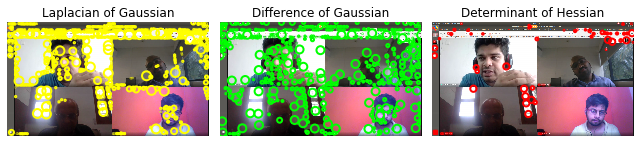

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
    
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()